# Cleaning Dataset


I created a dataframe from each sheet within the dataset originating from an excel document. I merged each new dataframe based on FIPS, State and County columns. Upon inspecting the dataframe merged with the smaller dataframes, I realized that some sheets must have contained states from Mexico. As a result, the county column for Mexico states had NaN values. I removed all rows that had NaN values in the county column. I inspected the dataframe again and realized that there were still rows that had many NaN values. I removed rows with 100 or more NaN values. I chose to remove these rows rather than filling in missing values was because I am examining data at the county level and filling in the missing values with the mean for the state doesn't add clarity to the data.

I am not concerned with outliers because I will be analyzing proportions.

In [1]:
#importing data file
import pandas as pd
file = 'Capstone1Data.xlsx'

In [2]:
data = pd.ExcelFile(file)

In [3]:
sheets = data.sheet_names

In [4]:
#accessing sheet names within file
print(sheets)

['Read_Me', 'Variable List', 'Supplemental Data - County', 'Supplemental Data - State', 'ACCESS', 'ASSISTANCE', 'HEALTH', 'INSECURITY', 'LOCAL', 'PRICES_TAXES', 'RESTAURANTS', 'STORES', 'SOCIOECONOMIC']


In [6]:
sheets = sheets[2:]
print(sheets)

['Supplemental Data - County', 'Supplemental Data - State', 'ACCESS', 'ASSISTANCE', 'HEALTH', 'INSECURITY', 'LOCAL', 'PRICES_TAXES', 'RESTAURANTS', 'STORES', 'SOCIOECONOMIC']


In [5]:
#transform each sheet into a dataframe
access = data.parse('ACCESS')
access.head()

,FIPS,State,County,LACCESS_POP10,PCT_LACCESS_POP10,LACCESS_LOWI10,PCT_LACCESS_LOWI10,LACCESS_CHILD10,PCT_LACCESS_CHILD10,LACCESS_SENIORS10,PCT_LACCESS_SENIORS10,LACCESS_HHNV10,PCT_LACCESS_HHNV10
0,1001,AL,Autauga,18428.439685,33.769657,5344.427472,9.793530,4822.500269,8.837112,2388.233228,4.376378,664.216487,3.284786
1,1003,AL,Baldwin,35210.814078,19.318473,9952.144027,5.460261,7916.131932,4.343199,6404.008603,3.513570,1571.779915,2.147827
2,1005,AL,Barbour,5722.305602,20.840972,3135.676086,11.420316,940.419327,3.425062,770.214550,2.805166,406.142372,4.135869
3,1007,AL,Bibb,1044.867327,4.559753,491.449066,2.144661,249.204753,1.087518,150.553323,0.657008,275.060875,3.458580
4,1009,AL,Blount,1548.175559,2.700840,609.027708,1.062468,384.911607,0.671490,195.049051,0.340269,705.466783,3.269380


In [6]:
access.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3256 entries, 0 to 3255
Data columns (total 13 columns):
FIPS                     3256 non-null int64
State                    3256 non-null object
County                   3256 non-null object
LACCESS_POP10            3144 non-null float64
PCT_LACCESS_POP10        3144 non-null float64
LACCESS_LOWI10           3144 non-null float64
PCT_LACCESS_LOWI10       3144 non-null float64
LACCESS_CHILD10          3144 non-null float64
PCT_LACCESS_CHILD10      3144 non-null float64
LACCESS_SENIORS10        3144 non-null float64
PCT_LACCESS_SENIORS10    3144 non-null float64
LACCESS_HHNV10           3144 non-null float64
PCT_LACCESS_HHNV10       3144 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 330.8+ KB


In [7]:
access_nan = access[access.isnull().any(axis=1)]
access_nan

,FIPS,State,County,LACCESS_POP10,PCT_LACCESS_POP10,LACCESS_LOWI10,PCT_LACCESS_LOWI10,LACCESS_CHILD10,PCT_LACCESS_CHILD10,LACCESS_SENIORS10,PCT_LACCESS_SENIORS10,LACCESS_HHNV10,PCT_LACCESS_HHNV10
67,2010,AK,Aleutian Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,2201,AK,Prince of Wales-Outer Ketchi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,2231,AK,Skagway-Yakutat-Angoon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,2232,AK,Skagway-Hoonah-Angoon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,2280,AK,Wrangell-Petersburg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,12025,FL,Dade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
558,15901,HI,Maui + Kalawao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1662,30113,MT,Yellowstone National Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2930,51560,VA,Clifton Forge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2958,51780,VA,South Boston,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
assistance = data.parse('ASSISTANCE')
assistance.head()

,FIPS,State,County,REDEMP_SNAPS08,REDEMP_SNAPS12,PCH_REDEMP_SNAPS_08_12,PCT_SNAP09,PCT_SNAP14,PCH_SNAP_09_14,PC_SNAPBEN08,...,REDEMP_WICS08,REDEMP_WICS12,PCH_REDEMP_WICS_08_12,PCT_WIC09,PCT_WIC14,PCH_WIC_09_14,PCT_CACFP09,PCT_CACFP14,PCH_CACFP_09_14,FDPIR12
0,1001,AL,Autauga,178994.046893,301432.081069,68.403411,14.423022,18.601836,4.178814,9.676490,...,161658.70,184744.3,14.280490,2.990417,2.702332,-0.288085,0.91609,0.928057,0.011967,0
1,1003,AL,Baldwin,160833.486714,274394.503663,70.607819,14.423022,18.601836,4.178814,5.626745,...,125840.50,126639.4,0.634881,2.990417,2.702332,-0.288085,0.91609,0.928057,0.011967,0
2,1005,AL,Barbour,295348.460706,325496.560766,10.207637,14.423022,18.601836,4.178814,17.085065,...,178230.60,157077.1,-11.868620,2.990417,2.702332,-0.288085,0.91609,0.928057,0.011967,0
3,1007,AL,Bibb,293106.955000,356444.032000,21.608862,14.423022,18.601836,4.178814,11.464172,...,92542.33,98263.4,6.182112,2.990417,2.702332,-0.288085,0.91609,0.928057,0.011967,0
4,1009,AL,Blount,199859.340233,229730.022632,14.945853,14.423022,18.601836,4.178814,8.998916,...,102945.90,149110.0,44.843050,2.990417,2.702332,-0.288085,0.91609,0.928057,0.011967,0


In [9]:
assistance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 55 columns):
FIPS                       3143 non-null int64
State                      3143 non-null object
County                     3143 non-null object
REDEMP_SNAPS08             2815 non-null float64
REDEMP_SNAPS12             2901 non-null float64
PCH_REDEMP_SNAPS_08_12     2801 non-null float64
PCT_SNAP09                 3143 non-null float64
PCT_SNAP14                 3143 non-null float64
PCH_SNAP_09_14             3143 non-null float64
PC_SNAPBEN08               3132 non-null float64
PC_SNAPBEN10               2753 non-null float64
PCH_PC_SNAPBEN_08_10       2752 non-null float64
SNAP_PART_RATE08           3143 non-null float64
SNAP_PART_RATE10           3143 non-null float64
SNAP_OAPP00                3143 non-null int64
SNAP_OAPP05                3143 non-null float64
SNAP_OAPP10                3143 non-null float64
SNAP_FACEWAIVER00          3143 non-null int64
SNAP_FACEWAIVER05  

In [10]:
health = data.parse('HEALTH')
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 19 columns):
FIPS                     3143 non-null int64
State                    3143 non-null object
County                   3143 non-null object
PCT_DIABETES_ADULTS09    3138 non-null float64
PCT_DIABETES_ADULTS10    3138 non-null float64
PCT_OBESE_ADULTS09       3138 non-null float64
PCT_OBESE_ADULTS10       3138 non-null float64
PCT_OBESE_ADULTS13       3138 non-null float64
PCT_OBESE_CHILD08        2691 non-null float64
PCT_OBESE_CHILD11        2714 non-null float64
PCH_OBESE_CHILD_08_11    2636 non-null float64
PCT_HSPA09               2503 non-null float64
RECFAC07                 3138 non-null float64
RECFAC12                 3138 non-null float64
PCH_RECFAC_07_12         3014 non-null float64
RECFACPTH07              3138 non-null float64
RECFACPTH12              3138 non-null float64
PCH_RECFACPTH_07_12      3014 non-null float64
NATAMEN                  3108 non-null float64
dtyp

In [11]:
insecurity = data.parse('INSECURITY')
insecurity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3256 entries, 0 to 3255
Data columns (total 15 columns):
FIPS                     3256 non-null int64
State                    3256 non-null object
County                   3256 non-null object
FOODINSEC_00_02          3144 non-null float64
FOODINSEC_07_09          3144 non-null float64
FOODINSEC_10_12          3144 non-null float64
CH_FOODINSEC_02_12       3144 non-null float64
CH_FOODINSEC_09_12       3144 non-null float64
VLFOODSEC_00_02          3144 non-null float64
VLFOODSEC_07_09          3144 non-null float64
VLFOODSEC_10_12          3144 non-null float64
CH_VLFOODSEC_02_12       3144 non-null float64
CH_VLFOODSEC_09_12       3144 non-null float64
FOODINSEC_CHILD_01_07    3144 non-null float64
FOODINSEC_CHILD_03_11    3144 non-null float64
dtypes: float64(12), int64(1), object(2)
memory usage: 381.6+ KB


In [12]:
local = data.parse('LOCAL')
local.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255 entries, 0 to 3254
Data columns (total 49 columns):
FIPS                    3255 non-null int64
State                   3255 non-null object
County                  3255 non-null object
DIRSALES_FARMS07        3078 non-null float64
PCT_LOCLFARM07          3021 non-null float64
PCT_LOCLSALE07          2750 non-null float64
DIRSALES07              2852 non-null float64
PC_DIRSALES07           2852 non-null float64
FMRKT09                 3141 non-null float64
FMRKT13                 3142 non-null float64
PCH_FMRKT_09_13         2659 non-null float64
FMRKTPTH09              3137 non-null float64
FMRKTPTH13              3138 non-null float64
PCH_FMRKTPTH_09_13      2655 non-null float64
FMRKT_SNAP13            2181 non-null float64
PCT_FMRKT_SNAP13        2181 non-null float64
FMRKT_WIC13             2181 non-null float64
PCT_FMRKT_WIC13         2181 non-null float64
FMRKT_WICCASH13         2181 non-null float64
PCT_FMRKT_WICCASH13    

In [13]:
prices_taxes = data.parse('PRICES_TAXES')
prices_taxes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3256 entries, 0 to 3255
Data columns (total 11 columns):
FIPS                 3256 non-null int64
State                3256 non-null object
County               3256 non-null object
MILK_PRICE10         3110 non-null float64
SODA_PRICE10         3110 non-null float64
MILK_SODA_PRICE10    3110 non-null float64
SODATAX_STORES11     3144 non-null float64
SODATAX_VENDM11      3144 non-null float64
CHIPSTAX_STORES11    3144 non-null float64
CHIPSTAX_VENDM11     3144 non-null float64
FOOD_TAX11           3144 non-null float64
dtypes: float64(8), int64(1), object(2)
memory usage: 279.9+ KB


In [14]:
restaurants = data.parse('RESTAURANTS')
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 19 columns):
FIPS                3143 non-null int64
State               3143 non-null object
County              3143 non-null object
FFR07               3138 non-null float64
FFR12               3143 non-null int64
PCH_FFR_07_12       3100 non-null float64
FFRPTH07            3138 non-null float64
FFRPTH12            3143 non-null float64
PCH_FFRPTH_07_12    3143 non-null float64
FSR07               3138 non-null float64
FSR12               3143 non-null int64
PCH_FSR_07_12       3115 non-null float64
FSRPTH07            3138 non-null float64
FSRPTH12            3143 non-null float64
PCH_FSRPTH_07_12    3143 non-null float64
PC_FFRSALES02       3127 non-null float64
PC_FFRSALES07       3143 non-null float64
PC_FSRSALES02       3127 non-null float64
PC_FSRSALES07       3143 non-null float64
dtypes: float64(14), int64(3), object(2)
memory usage: 466.6+ KB


In [15]:
stores = data.parse('STORES')
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 39 columns):
FIPS                   3221 non-null int64
State                  3221 non-null object
County                 3143 non-null object
GROC07                 3143 non-null float64
GROC12                 3143 non-null float64
PCH_GROC_07_12         3116 non-null float64
GROCPTH07              3143 non-null float64
GROCPTH12              3143 non-null float64
PCH_GROCPTH_07_12      3121 non-null float64
SUPERC07               3143 non-null float64
SUPERC12               3143 non-null float64
PCH_SUPERC_07_12       2638 non-null float64
SUPERCPTH07            3143 non-null float64
SUPERCPTH12            3143 non-null float64
PCH_SUPERCPTH_07_12    2638 non-null float64
CONVS07                3143 non-null float64
CONVS12                3143 non-null float64
PCH_CONVS_07_12        3118 non-null float64
CONVSPTH07             3143 non-null float64
CONVSPTH12             3143 non-null float

In [16]:
socioeconomic = data.parse('SOCIOECONOMIC')
socioeconomic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 18 columns):
FIPS               3143 non-null int64
State              3143 non-null object
County             3143 non-null object
PCT_NHWHITE10      3143 non-null float64
PCT_NHBLACK10      3143 non-null float64
PCT_HISP10         3143 non-null float64
PCT_NHASIAN10      3143 non-null float64
PCT_NHNA10         3143 non-null float64
PCT_NHPI10         3143 non-null float64
PCT_65OLDER10      3143 non-null float64
PCT_18YOUNGER10    3143 non-null float64
MEDHHINC10         3143 non-null object
POVRATE10          3143 non-null object
PERPOV10           3143 non-null int64
CHILDPOVRATE10     3143 non-null object
PERCHLDPOV10       3143 non-null int64
METRO13            3143 non-null int64
POPLOSS00          3143 non-null object
dtypes: float64(8), int64(4), object(6)
memory usage: 442.1+ KB


In [18]:
#merge converted data frames to one large data frame indexing on FIPS, State, and County
all_data = pd.merge(access,assistance,on=['FIPS','State','County'],how='outer')
all_data.head()

,FIPS,State,County,LACCESS_POP10,PCT_LACCESS_POP10,LACCESS_LOWI10,PCT_LACCESS_LOWI10,LACCESS_CHILD10,PCT_LACCESS_CHILD10,LACCESS_SENIORS10,...,REDEMP_WICS08,REDEMP_WICS12,PCH_REDEMP_WICS_08_12,PCT_WIC09,PCT_WIC14,PCH_WIC_09_14,PCT_CACFP09,PCT_CACFP14,PCH_CACFP_09_14,FDPIR12
0,1001,AL,Autauga,18428.439685,33.769657,5344.427472,9.793530,4822.500269,8.837112,2388.233228,...,161658.70,184744.3,14.280490,2.990417,2.702332,-0.288085,0.91609,0.928057,0.011967,0.0
1,1003,AL,Baldwin,35210.814078,19.318473,9952.144027,5.460261,7916.131932,4.343199,6404.008603,...,125840.50,126639.4,0.634881,2.990417,2.702332,-0.288085,0.91609,0.928057,0.011967,0.0
2,1005,AL,Barbour,5722.305602,20.840972,3135.676086,11.420316,940.419327,3.425062,770.214550,...,178230.60,157077.1,-11.868620,2.990417,2.702332,-0.288085,0.91609,0.928057,0.011967,0.0
3,1007,AL,Bibb,1044.867327,4.559753,491.449066,2.144661,249.204753,1.087518,150.553323,...,92542.33,98263.4,6.182112,2.990417,2.702332,-0.288085,0.91609,0.928057,0.011967,0.0
4,1009,AL,Blount,1548.175559,2.700840,609.027708,1.062468,384.911607,0.671490,195.049051,...,102945.90,149110.0,44.843050,2.990417,2.702332,-0.288085,0.91609,0.928057,0.011967,0.0


In [19]:
all_data = pd.merge(all_data,insecurity,on=['FIPS','State','County'],how='outer')
all_data.head()

,FIPS,State,County,LACCESS_POP10,PCT_LACCESS_POP10,LACCESS_LOWI10,PCT_LACCESS_LOWI10,LACCESS_CHILD10,PCT_LACCESS_CHILD10,LACCESS_SENIORS10,...,FOODINSEC_10_12,CH_FOODINSEC_02_12,CH_FOODINSEC_09_12,VLFOODSEC_00_02,VLFOODSEC_07_09,VLFOODSEC_10_12,CH_VLFOODSEC_02_12,CH_VLFOODSEC_09_12,FOODINSEC_CHILD_01_07,FOODINSEC_CHILD_03_11
0,1001,AL,Autauga,18428.439685,33.769657,5344.427472,9.793530,4822.500269,8.837112,2388.233228,...,17.9,5.4,2.9,3.7,6.8,6.8,3.1,0.0,8.5,9.3
1,1003,AL,Baldwin,35210.814078,19.318473,9952.144027,5.460261,7916.131932,4.343199,6404.008603,...,17.9,5.4,2.9,3.7,6.8,6.8,3.1,0.0,8.5,9.3
2,1005,AL,Barbour,5722.305602,20.840972,3135.676086,11.420316,940.419327,3.425062,770.214550,...,17.9,5.4,2.9,3.7,6.8,6.8,3.1,0.0,8.5,9.3
3,1007,AL,Bibb,1044.867327,4.559753,491.449066,2.144661,249.204753,1.087518,150.553323,...,17.9,5.4,2.9,3.7,6.8,6.8,3.1,0.0,8.5,9.3
4,1009,AL,Blount,1548.175559,2.700840,609.027708,1.062468,384.911607,0.671490,195.049051,...,17.9,5.4,2.9,3.7,6.8,6.8,3.1,0.0,8.5,9.3


In [20]:
all_data = pd.merge(all_data,local,on=['FIPS','State','County'],how='outer')
all_data.head()

,FIPS,State,County,LACCESS_POP10,PCT_LACCESS_POP10,LACCESS_LOWI10,PCT_LACCESS_LOWI10,LACCESS_CHILD10,PCT_LACCESS_CHILD10,LACCESS_SENIORS10,...,BERRY_ACRESPTH07,SLHOUSE07,GHVEG_FARMS07,GHVEG_SQFT07,GHVEG_SQFTPTH07,FOODHUB12,CSA07,AGRITRSM_OPS07,AGRITRSM_RCT07,FARM_TO_SCHOOL
0,1001,AL,Autauga,18428.439685,33.769657,5344.427472,9.793530,4822.500269,8.837112,2388.233228,...,NaN,0.0,0.0,0.0,0.0,0.0,2.0,7.0,228000.0,0.0
1,1003,AL,Baldwin,35210.814078,19.318473,9952.144027,5.460261,7916.131932,4.343199,6404.008603,...,0.457136,1.0,0.0,0.0,0.0,0.0,13.0,18.0,124000.0,0.0
2,1005,AL,Barbour,5722.305602,20.840972,3135.676086,11.420316,940.419327,3.425062,770.214550,...,NaN,0.0,0.0,0.0,0.0,0.0,1.0,27.0,163000.0,0.0
3,1007,AL,Bibb,1044.867327,4.559753,491.449066,2.144661,249.204753,1.087518,150.553323,...,0.279265,0.0,0.0,0.0,0.0,0.0,2.0,5.0,NaN,0.0
4,1009,AL,Blount,1548.175559,2.700840,609.027708,1.062468,384.911607,0.671490,195.049051,...,0.492386,0.0,2.0,NaN,NaN,0.0,7.0,10.0,293000.0,0.0


In [21]:
all_data = pd.merge(all_data,prices_taxes,on=['FIPS','State','County'],how='outer')
all_data.head()

,FIPS,State,County,LACCESS_POP10,PCT_LACCESS_POP10,LACCESS_LOWI10,PCT_LACCESS_LOWI10,LACCESS_CHILD10,PCT_LACCESS_CHILD10,LACCESS_SENIORS10,...,AGRITRSM_RCT07,FARM_TO_SCHOOL,MILK_PRICE10,SODA_PRICE10,MILK_SODA_PRICE10,SODATAX_STORES11,SODATAX_VENDM11,CHIPSTAX_STORES11,CHIPSTAX_VENDM11,FOOD_TAX11
0,1001,AL,Autauga,18428.439685,33.769657,5344.427472,9.793530,4822.500269,8.837112,2388.233228,...,228000.0,0.0,0.970305,0.972216,0.923289,4.0,4.0,4.0,4.0,4.0
1,1003,AL,Baldwin,35210.814078,19.318473,9952.144027,5.460261,7916.131932,4.343199,6404.008603,...,124000.0,0.0,1.017690,1.001391,0.940165,4.0,4.0,4.0,4.0,4.0
2,1005,AL,Barbour,5722.305602,20.840972,3135.676086,11.420316,940.419327,3.425062,770.214550,...,163000.0,0.0,1.136671,0.992584,1.059400,4.0,4.0,4.0,4.0,4.0
3,1007,AL,Bibb,1044.867327,4.559753,491.449066,2.144661,249.204753,1.087518,150.553323,...,NaN,0.0,0.970305,0.972216,0.923289,4.0,4.0,4.0,4.0,4.0
4,1009,AL,Blount,1548.175559,2.700840,609.027708,1.062468,384.911607,0.671490,195.049051,...,293000.0,0.0,0.970305,0.972216,0.923289,4.0,4.0,4.0,4.0,4.0


In [22]:
all_data = pd.merge(all_data,restaurants,on=['FIPS','State','County'],how='outer')
all_data.head()

,FIPS,State,County,LACCESS_POP10,PCT_LACCESS_POP10,LACCESS_LOWI10,PCT_LACCESS_LOWI10,LACCESS_CHILD10,PCT_LACCESS_CHILD10,LACCESS_SENIORS10,...,FSR07,FSR12,PCH_FSR_07_12,FSRPTH07,FSRPTH12,PCH_FSRPTH_07_12,PC_FFRSALES02,PC_FFRSALES07,PC_FSRSALES02,PC_FSRSALES07
0,1001,AL,Autauga,18428.439685,33.769657,5344.427472,9.793530,4822.500269,8.837112,2388.233228,...,34.0,29.0,-14.705882,0.682265,0.522391,-23.432881,470.0,649.511367,349.0,484.381507
1,1003,AL,Baldwin,35210.814078,19.318473,9952.144027,5.460261,7916.131932,4.343199,6404.008603,...,184.0,211.0,14.673913,1.064722,1.105928,3.870079,470.0,649.511367,349.0,484.381507
2,1005,AL,Barbour,5722.305602,20.840972,3135.676086,11.420316,940.419327,3.425062,770.214550,...,11.0,14.0,27.272727,0.369922,0.514687,39.133922,470.0,649.511367,349.0,484.381507
3,1007,AL,Bibb,1044.867327,4.559753,491.449066,2.144661,249.204753,1.087518,150.553323,...,8.0,4.0,-50.000000,0.372353,0.177015,-52.460504,470.0,649.511367,349.0,484.381507
4,1009,AL,Blount,1548.175559,2.700840,609.027708,1.062468,384.911607,0.671490,195.049051,...,14.0,13.0,-7.142857,0.246193,0.224812,-8.684428,470.0,649.511367,349.0,484.381507


In [23]:
all_data = pd.merge(all_data,stores,on=['FIPS','State','County'],how='outer')
all_data.head()

,FIPS,State,County,LACCESS_POP10,PCT_LACCESS_POP10,LACCESS_LOWI10,PCT_LACCESS_LOWI10,LACCESS_CHILD10,PCT_LACCESS_CHILD10,LACCESS_SENIORS10,...,PCH_SNAPS_08_12,SNAPSPTH08,SNAPSPTH12,PCH_SNAPSPTH_08_12,WICS08,WICS12,PCH_WICS_08_12,WICSPTH08,WICSPTH12,PCH_WICSPTH_08_12
0,1001,AL,Autauga,18428.439685,33.769657,5344.427472,9.793530,4822.500269,8.837112,2388.233228,...,17.232376,0.633846,0.674004,6.335682,6.0,5.0,-16.66667,0.119156,0.090067,-24.412460
1,1003,AL,Baldwin,35210.814078,19.318473,9952.144027,5.460261,7916.131932,4.343199,6404.008603,...,68.870804,0.464876,0.725055,55.967619,25.0,27.0,8.00000,0.141875,0.141517,-0.252126
2,1005,AL,Barbour,5722.305602,20.840972,3135.676086,11.420316,940.419327,3.425062,770.214550,...,63.921569,0.712227,1.280590,79.800887,6.0,7.0,16.66667,0.201099,0.257344,27.968330
3,1007,AL,Bibb,1044.867327,4.559753,491.449066,2.144661,249.204753,1.087518,150.553323,...,62.500000,0.463199,0.719122,55.251250,6.0,5.0,-16.66667,0.277919,0.221268,-20.383970
4,1009,AL,Blount,1548.175559,2.700840,609.027708,1.062468,384.911607,0.671490,195.049051,...,77.431907,0.370569,0.657144,77.333719,10.0,6.0,-40.00000,0.173028,0.103760,-40.033200


In [24]:
all_data = pd.merge(all_data,socioeconomic,on=['FIPS','State','County'],how='outer')
all_data.head()

,FIPS,State,County,LACCESS_POP10,PCT_LACCESS_POP10,LACCESS_LOWI10,PCT_LACCESS_LOWI10,LACCESS_CHILD10,PCT_LACCESS_CHILD10,LACCESS_SENIORS10,...,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC10,POVRATE10,PERPOV10,CHILDPOVRATE10,PERCHLDPOV10,METRO13,POPLOSS00
0,1001,AL,Autauga,18428.439685,33.769657,5344.427472,9.793530,4822.500269,8.837112,2388.233228,...,0.040314,11.995382,26.777959,53049,11.9,0.0,17.5,0.0,1.0,0
1,1003,AL,Baldwin,35210.814078,19.318473,9952.144027,5.460261,7916.131932,4.343199,6404.008603,...,0.043343,16.771185,22.987408,47618,13.3,0.0,20.2,0.0,1.0,0
2,1005,AL,Barbour,5722.305602,20.840972,3135.676086,11.420316,940.419327,3.425062,770.214550,...,0.087409,14.236807,21.906982,33074,25.3,1.0,36.2,1.0,0.0,0
3,1007,AL,Bibb,1044.867327,4.559753,491.449066,2.144661,249.204753,1.087518,150.553323,...,0.030548,12.681650,22.696923,35472,20.9,0.0,28.6,1.0,1.0,0
4,1009,AL,Blount,1548.175559,2.700840,609.027708,1.062468,384.911607,0.671490,195.049051,...,0.031402,14.722096,24.608353,42906,16.5,0.0,24.1,0.0,1.0,0


In [81]:
all_data = pd.merge(all_data,health,on=['FIPS','State','County'],how='outer')
all_data.head()

,FIPS,State,County,LACCESS_POP10,PCT_LACCESS_POP10,LACCESS_LOWI10,PCT_LACCESS_LOWI10,LACCESS_CHILD10,PCT_LACCESS_CHILD10,LACCESS_SENIORS10,...,PCT_OBESE_CHILD11,PCH_OBESE_CHILD_08_11,PCT_HSPA09,RECFAC07,RECFAC12,PCH_RECFAC_07_12,RECFACPTH07,RECFACPTH12,PCH_RECFACPTH_07_12,NATAMEN
0,1001,AL,Autauga,18428.439685,33.769657,5344.427472,9.793530,4822.500269,8.837112,2388.233228,...,13.5,1.1,19.4,5.0,5.0,0.000000,0.100333,0.090067,-10.231653,4.0
1,1003,AL,Baldwin,35210.814078,19.318473,9952.144027,5.460261,7916.131932,4.343199,6404.008603,...,13.3,2.5,19.4,17.0,20.0,17.647059,0.098371,0.104827,6.563114,4.0
2,1005,AL,Barbour,5722.305602,20.840972,3135.676086,11.420316,940.419327,3.425062,770.214550,...,18.6,-2.2,19.4,1.0,1.0,0.000000,0.033629,0.036763,9.319510,4.0
3,1007,AL,Bibb,1044.867327,4.559753,491.449066,2.144661,249.204753,1.087518,150.553323,...,13.7,-1.7,19.4,2.0,0.0,-100.000000,0.093088,0.000000,-100.000000,3.0
4,1009,AL,Blount,1548.175559,2.700840,609.027708,1.062468,384.911607,0.671490,195.049051,...,18.5,-1.4,19.4,3.0,1.0,-66.666667,0.052756,0.017293,-67.220051,4.0


In [82]:
#isolate rows without County
no_county = all_data[all_data.County.isnull()]
no_county

,FIPS,State,County,LACCESS_POP10,PCT_LACCESS_POP10,LACCESS_LOWI10,PCT_LACCESS_LOWI10,LACCESS_CHILD10,PCT_LACCESS_CHILD10,LACCESS_SENIORS10,...,PCT_OBESE_CHILD11,PCH_OBESE_CHILD_08_11,PCT_HSPA09,RECFAC07,RECFAC12,PCH_RECFAC_07_12,RECFACPTH07,RECFACPTH12,PCH_RECFACPTH_07_12,NATAMEN
3262,72001,Adjuntas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3263,72003,Aguada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3264,72005,Aguadilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3265,72007,Aguas Buenas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3266,72009,Aibonito,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3267,72011,Anasco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3268,72013,Arecibo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3269,72015,Arroyo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3270,72017,Barceloneta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3271,72019,Barranquitas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
#remove rows without County
data_cleaner = all_data[all_data.County.notnull()]
data_cleaner

,FIPS,State,County,LACCESS_POP10,PCT_LACCESS_POP10,LACCESS_LOWI10,PCT_LACCESS_LOWI10,LACCESS_CHILD10,PCT_LACCESS_CHILD10,LACCESS_SENIORS10,...,PCT_OBESE_CHILD11,PCH_OBESE_CHILD_08_11,PCT_HSPA09,RECFAC07,RECFAC12,PCH_RECFAC_07_12,RECFACPTH07,RECFACPTH12,PCH_RECFACPTH_07_12,NATAMEN
0,1001,AL,Autauga,18428.439685,33.769657,5344.427472,9.793530,4822.500269,8.837112,2388.233228,...,13.5,1.1,19.4,5.0,5.0,0.000000,0.100333,0.090067,-10.231653,4.0
1,1003,AL,Baldwin,35210.814078,19.318473,9952.144027,5.460261,7916.131932,4.343199,6404.008603,...,13.3,2.5,19.4,17.0,20.0,17.647059,0.098371,0.104827,6.563114,4.0
2,1005,AL,Barbour,5722.305602,20.840972,3135.676086,11.420316,940.419327,3.425062,770.214550,...,18.6,-2.2,19.4,1.0,1.0,0.000000,0.033629,0.036763,9.319510,4.0
3,1007,AL,Bibb,1044.867327,4.559753,491.449066,2.144661,249.204753,1.087518,150.553323,...,13.7,-1.7,19.4,2.0,0.0,-100.000000,0.093088,0.000000,-100.000000,3.0
4,1009,AL,Blount,1548.175559,2.700840,609.027708,1.062468,384.911607,0.671490,195.049051,...,18.5,-1.4,19.4,3.0,1.0,-66.666667,0.052756,0.017293,-67.220051,4.0
5,1011,AL,Bullock,4089.983548,37.474652,2199.359828,20.151730,607.097868,5.562561,554.388021,...,17.6,2.0,19.4,0.0,0.0,0.000000,0.000000,0.000000,0.000000,3.0
6,1013,AL,Butler,1307.819706,6.243470,593.225139,2.832029,264.826077,1.264267,254.954428,...,14.4,6.7,19.4,0.0,1.0,NaN,0.000000,0.049244,NaN,3.0
7,1015,AL,Calhoun,30901.150585,26.061086,11909.162858,10.043824,6959.887106,5.869756,4974.957133,...,13.1,-2.0,19.4,8.0,7.0,-12.500000,0.070917,0.059678,-15.847940,4.0
8,1017,AL,Chambers,6748.213223,19.722967,3018.284747,8.821525,1531.676677,4.476623,1170.805467,...,11.7,4.7,19.4,2.0,0.0,-100.000000,0.057585,0.000000,-100.000000,3.0
9,1019,AL,Cherokee,79.410235,0.305553,34.483862,0.132686,17.326047,0.066667,9.222340,...,15.4,1.1,19.4,1.0,1.0,0.000000,0.040860,0.038430,-5.945198,4.0


In [92]:
#remove rows with PR as state
data_cleaner1 = data_cleaner[data_cleaner.State != 'PR']
data_cleaner1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3184 entries, 0 to 3183
Columns: 214 entries, FIPS to NATAMEN
dtypes: float64(207), int64(1), object(6)
memory usage: 5.2+ MB


In [93]:
#remove rows with more than 100 NaNs - there are a total of 34 rows dropped this way
#34 is not a significantly large number of rows so I feel comfortable dropping these rows
data_cleanest = data_cleaner1.dropna(thresh=100)
data_cleanest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3150 entries, 0 to 3183
Columns: 214 entries, FIPS to NATAMEN
dtypes: float64(207), int64(1), object(6)
memory usage: 5.2+ MB


In [94]:
#reset index
data_cleanest1 = data_cleanest.reset_index()

In [95]:
data_cleanest1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Columns: 215 entries, index to NATAMEN
dtypes: float64(207), int64(2), object(6)
memory usage: 5.2+ MB


In [96]:
data_cleanest2 = data_cleanest1.drop('index',1)
data_cleanest2.head()

,FIPS,State,County,LACCESS_POP10,PCT_LACCESS_POP10,LACCESS_LOWI10,PCT_LACCESS_LOWI10,LACCESS_CHILD10,PCT_LACCESS_CHILD10,LACCESS_SENIORS10,...,PCT_OBESE_CHILD11,PCH_OBESE_CHILD_08_11,PCT_HSPA09,RECFAC07,RECFAC12,PCH_RECFAC_07_12,RECFACPTH07,RECFACPTH12,PCH_RECFACPTH_07_12,NATAMEN
0,1001,AL,Autauga,18428.439685,33.769657,5344.427472,9.793530,4822.500269,8.837112,2388.233228,...,13.5,1.1,19.4,5.0,5.0,0.000000,0.100333,0.090067,-10.231653,4.0
1,1003,AL,Baldwin,35210.814078,19.318473,9952.144027,5.460261,7916.131932,4.343199,6404.008603,...,13.3,2.5,19.4,17.0,20.0,17.647059,0.098371,0.104827,6.563114,4.0
2,1005,AL,Barbour,5722.305602,20.840972,3135.676086,11.420316,940.419327,3.425062,770.214550,...,18.6,-2.2,19.4,1.0,1.0,0.000000,0.033629,0.036763,9.319510,4.0
3,1007,AL,Bibb,1044.867327,4.559753,491.449066,2.144661,249.204753,1.087518,150.553323,...,13.7,-1.7,19.4,2.0,0.0,-100.000000,0.093088,0.000000,-100.000000,3.0
4,1009,AL,Blount,1548.175559,2.700840,609.027708,1.062468,384.911607,0.671490,195.049051,...,18.5,-1.4,19.4,3.0,1.0,-66.666667,0.052756,0.017293,-67.220051,4.0


In [172]:
#visulization using matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Data Story

I want to first visualize the obesity epidemic in the United States overall.

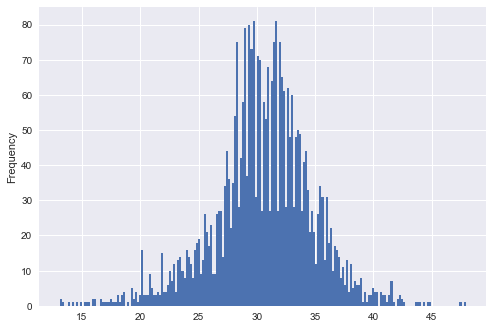

In [173]:
#histogram of percentage of obese adults by county
data_cleanest2['PCT_OBESE_ADULTS10'].plot.hist(bins=200)
plt.show()

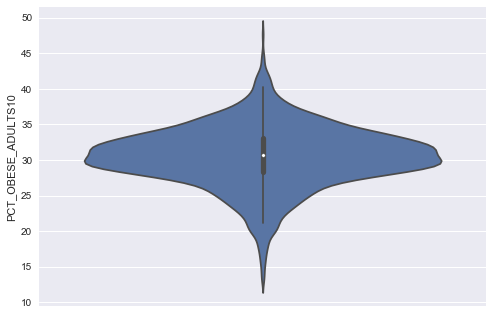

In [174]:
#violin plot of percentage of obese adults by county
sns.violinplot(y='PCT_OBESE_ADULTS10',data=data_cleanest2)
plt.show()

From looking at both the histogram and the violin plot above, the median percentage of obese adults by county is about 31%. The the county with the smallest percentage of obese adults had a percentage of about 11% and the county with the largest percentage of obese adults had a percentage of about 50%.

My prior studies of food deserts lead me to hypothesize that counties with less access to stores is related to increase proportions of adult obesity. Below, I visualize the percentage of low income and low access to stores against percentage adult obesity. 

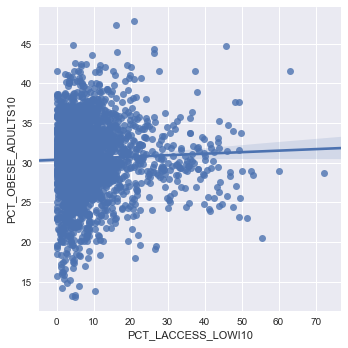

In [175]:
sns.lmplot(x='PCT_LACCESS_LOWI10', y='PCT_OBESE_ADULTS10', data=data_cleanest2)
plt.show()

The above plot does not show a significant relationship between the percentage of low income and low access to stores and percentage adult obesity. 

Access to stores may not be the best measure across the entire country since there may be a signficant difference between urban and rural counties. I want differentiate the data by urban and rural counties.

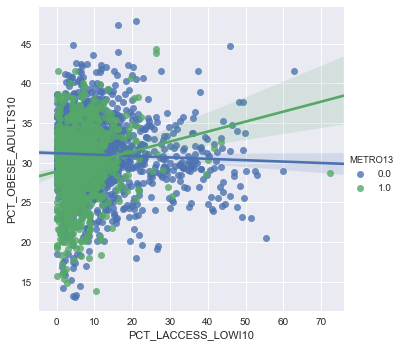

In [176]:
sns.lmplot(x='PCT_LACCESS_LOWI10', y='PCT_OBESE_ADULTS10', hue='METRO13', data=data_cleanest2)
plt.show()

Upon visual inspection, there still isn't strong visual evidence that there is a relationship between access to stores and proportion of adult obesity. My previous studies about food deserts focused on lack of grocery stores, not stores in general. The variable in this low access to stores is not just grocery stores, but all stores in general. 

Let's take a look at the number of grocery stores per 1000 people against the adult obesity rate.

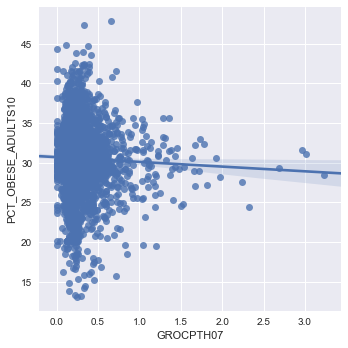

In [177]:
sns.lmplot(x='GROCPTH07', y='PCT_OBESE_ADULTS10', data=data_cleanest2)
plt.show()

Still no strong visual evidence that more grocery stores per 1000 people results in lower adult obesity rate.

Another variable that may be interesting to plot against adult obesity is percentage of students in county who recieve free lunch at school. This metric is directly related to income and generally, lower income populations are more likely to become obese.

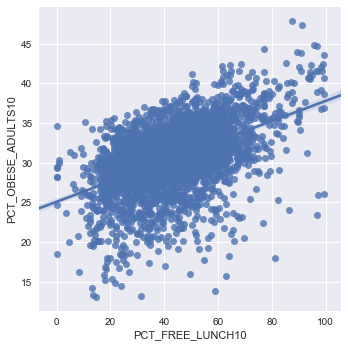

In [178]:
sns.lmplot(x='PCT_FREE_LUNCH10', y='PCT_OBESE_ADULTS10', data=data_cleanest2)
plt.show()

The visualization above shows a strong relationship between percentage of students receiving free lunch at school and the adult obesity rate. 

I want to see how rural and urban counties differ.

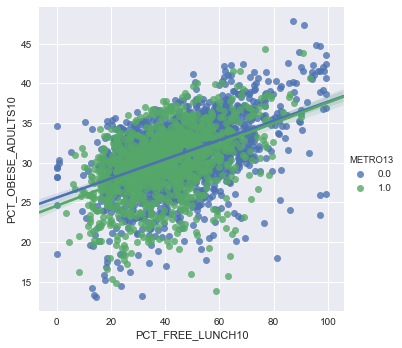

In [179]:
sns.lmplot(x='PCT_FREE_LUNCH10', y='PCT_OBESE_ADULTS10', hue='METRO13',data=data_cleanest2)
plt.show()

There is no significant difference when segmenting by rural or urban.

Another variable directly related to income is the percentage of the population that use food stamps. I plot percentage of county using food stamps vs adult obesity rate.

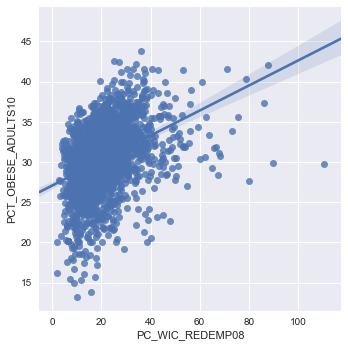

In [180]:
sns.lmplot(x='PC_WIC_REDEMP08', y='PCT_OBESE_ADULTS10', data=data_cleanest2)
plt.show()

There does appear to be a relationship between percentage of population using food stamps and the adult obesity rate in that county. There appears to be an error in the dataset - it's not possible for the proportion of the population using food stamps to be greater than 100%. I will need to address this later. Let's see if there is a difference in rural and urban populations.

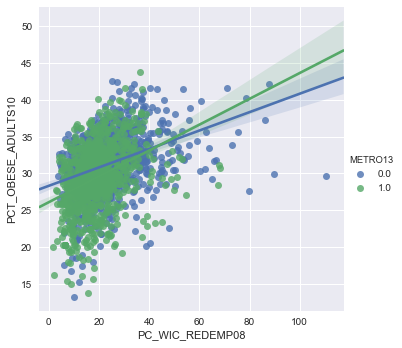

In [181]:
sns.lmplot(x='PC_WIC_REDEMP08', y='PCT_OBESE_ADULTS10', hue='METRO13',data=data_cleanest2)
plt.show()

There is a slight difference when segmenting by rural and urban. There appears to be a slightly stronger relationship between food stamps and adult obesity in metro counties vs rural counties.

Next, I want to examine how the adult obesity rate overall differs by state.

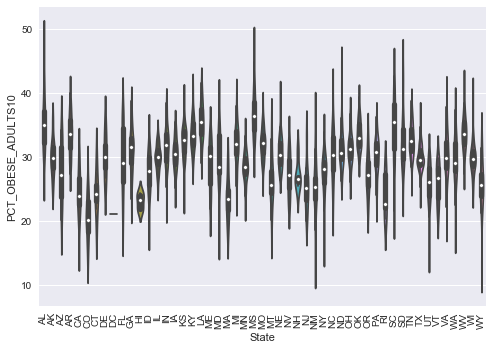

In [182]:
sns.violinplot(x='State', y='PCT_OBESE_ADULTS10', data=data_cleanest2)
plt.xticks(rotation=90)
plt.show()

States with the highest median adult obesity rate are Alabama, Mississippi, and South Carolina. Alabama and Mississippi also have the counties with the highest rates of adult obesity in the country. 

Let's segment states by rural and urban counties.

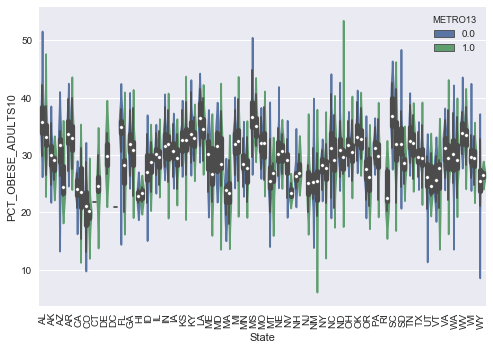

In [183]:
sns.violinplot(x='State', y='PCT_OBESE_ADULTS10', hue='METRO13', data=data_cleanest2)
plt.xticks(rotation=90)
plt.show()

Overall, there doesn't appear to be a specific trend when segmenting rural and urban. However, when we examine Alabama and Mississippi, rural counties have a higher median adult obesity rate and higher maximum adult obesity rate. It would be interesting to group states by region (Southeast, New England, Mid-atlantic, Midwest, Mountain, West Coast).

Another variable that I want segment is whether the county is persistent poverty.

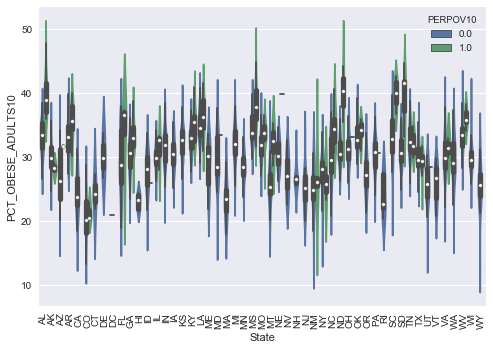

In [184]:
sns.violinplot(x='State', y='PCT_OBESE_ADULTS10', hue='PERPOV10', data=data_cleanest2)
plt.xticks(rotation=90)
plt.show()

Counties classified as being in persistent poverty appear to have higher rates of adult obesity than counties not classified as such across most states. 

# Hypotheses and further analysis

I want to group states based on the proportion of counties with persistent poverty and group states by the average of the proportion of students receiving free school lunches. I hypothesize that states with more counties with persistent poverty will have a higher rate of adult obesity. I also hypothesize that states with a higher average of proporiton of students receiving free school lunches will have a higher rate of adult obesity. 